# Understanding global trend of investment

Understanding the data files Companies and Rounds2 .

In [1]:
import numpy as np
import pandas as pd
# load companies and rounds2 data file

companies=pd.read_csv("../Investement analysis/companies.txt",sep="\t",encoding ="ISO-8859-1")
rounds2=pd.read_csv("../Investement analysis/rounds2.csv",encoding="ISO-8859-1")


In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Ofidium,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


**companies data file has 66368 unique companies**

In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


It is observed that  column “permalink” and “company_pemalink” in companies and rounds2 data files respectively can be used as common column  for merging to build master_frame. But before that we need to adjust upper and lower case , so that unique Id of company can evenly match which is essential for merging and also name of column “company_permalink” is changed into “permalink”.
All the Unique ID is converted into upper case in both data files.

In [5]:
#Changing text to upper case in permalink
companies["permalink"]=[text.upper() for text in companies["permalink"]]

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
#Changing text to upper case in company_permalink
rounds2["company_permalink"]=[text.upper() for text in rounds2["company_permalink"]]
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# Remaning columns from company_pemalink to permalink , as merging can only be done at common column in both dataframe.
rounds2=rounds2.rename(columns={'company_permalink':'permalink'})
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
# Finding unique companies in round2
rounds2.permalink.describe()

count                       114949
unique                       66370
top       /ORGANIZATION/SOLARFLARE
freq                            19
Name: permalink, dtype: object

In [9]:
#merging companies dataframe with rounds2 dataframe

master_frame=pd.merge(companies,rounds2,how="inner",on="permalink")


In [10]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


After merging data set , we will start with handling missing values in data , to avoide any unreasonable assumptions.

Indentify missing value count in each columns.

In [11]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

Since Spark Funds is only intrested in Funding type (venture, angel, seed, and private equity).
Rest others funding types are of no use. So we will filter out rows who has other than above mentioned funding type.

In [12]:
funding_type=['venture','angel','seed','private_equity']
master_frame.loc[master_frame['funding_round_type'].isin(funding_type),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0


In [13]:
# Filtering master_frame , with only 4 investment types (venture, seed , angel and private_equity)
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_type)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94390 entries, 0 to 114940
Data columns (total 15 columns):
permalink                  94390 non-null object
name                       94389 non-null object
homepage_url               90247 non-null object
category_list              91896 non-null object
status                     94390 non-null object
country_code               87076 non-null object
state_code                 85118 non-null object
region                     85838 non-null object
city                       85841 non-null object
founded_at                 77672 non-null object
funding_round_permalink    94390 non-null object
funding_round_type         94390 non-null object
funding_round_code         31119 non-null object
funded_at                  94390 non-null object
raised_amount_usd          80626 non-null float64
dtypes: float64(1), object(14)
memory usage: 11.5+ MB


#### Now lets have a look at percentage of missing values in each columns

In [14]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.39
category_list               2.64
status                      0.00
country_code                7.75
state_code                  9.82
region                      9.06
city                        9.06
founded_at                 17.71
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         67.03
funded_at                   0.00
raised_amount_usd          14.58
dtype: float64

Raised_amount_usd has 14.58% of missing values. So keeping these values will causes unexpected results in finding avergae investment amount. Hence rows with missing raised_amount_usd will be removed.

In [15]:
master_frame=master_frame[~np.isnan(master_frame["raised_amount_usd"])]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80626 entries, 0 to 114940
Data columns (total 15 columns):
permalink                  80626 non-null object
name                       80625 non-null object
homepage_url               77181 non-null object
category_list              79771 non-null object
status                     80626 non-null object
country_code               75606 non-null object
state_code                 74055 non-null object
region                     74564 non-null object
city                       74567 non-null object
founded_at                 67180 non-null object
funding_round_permalink    80626 non-null object
funding_round_type         80626 non-null object
funding_round_code         28153 non-null object
funded_at                  80626 non-null object
raised_amount_usd          80626 non-null float64
dtypes: float64(1), object(14)
memory usage: 9.8+ MB


In [16]:
# Percentage of missing values in each columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.27
category_list               1.06
status                      0.00
country_code                6.23
state_code                  8.15
region                      7.52
city                        7.51
founded_at                 16.68
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         65.08
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [17]:
master_frame.loc[master_frame["country_code"].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
32,/ORGANIZATION/1000CHI,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0
66,/ORGANIZATION/10K-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,100000.0
95,/ORGANIZATION/1234ENTER,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0
96,/ORGANIZATION/1234ENTER,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,500000.0
100,/ORGANIZATION/123GREETINGS,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0
127,/ORGANIZATION/15MINUTESNOW,15MinutesNOW,http://15minutesnow.com,Games,operating,NaN,NaN,NaN,NaN,19-04-2011,/funding-round/9352dd0999084c880e8f62cbe3a2095e,seed,NaN,10-05-2011,200000.0
133,/ORGANIZATION/17-MEDIA,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0
145,/ORGANIZATION/1800DIAPERS,1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7000000.0
173,/ORGANIZATION/1LAY,1Lay,http://1lay.com,Mobile|Mobile Devices|Mobile Security|Security...,operating,NaN,NaN,NaN,NaN,18-07-2013,/funding-round/0008af0992808995558ed19069bc14e6,seed,NaN,02-11-2015,210000.0


Columns founded_at,funding_round_code,city,region,state_code has large percentage of missing values as 16.68%,65.08%,7.52%,7.51%,8.15% respectively. Since these columns are not usefull for underdstanding data, removing those will not harm anything.
Variables which plays important role in understand is **Company's name , category_list , country and funding amount.**

Also we have observed that many rows has country_code along with state_code  is null , since this is one of the important variable to understanding investment trends , to avoid any unreasonable assumption we will remove rows whose country_code value is NULL.

In [18]:
# dropping columns "founded_at,funding_round_code,city,region,state_code,homepage_url"
master_frame=master_frame.drop("funding_round_code",axis=1)
master_frame=master_frame.drop("founded_at",axis=1)
master_frame=master_frame.drop("homepage_url",axis=1)
master_frame=master_frame.drop("state_code",axis=1)
master_frame=master_frame.drop("region",axis=1)
master_frame=master_frame.drop("city",axis=1)

round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              1.06
status                     0.00
country_code               6.23
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [19]:
# dropping rows whose country code value is null
#master_frame.loc[master_frame["country_code"].isnull()]
master_frame=master_frame.loc[master_frame["country_code"].notnull()]


In [20]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              0.64
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [21]:
master_frame.info()
#75606

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75606 entries, 0 to 114940
Data columns (total 9 columns):
permalink                  75606 non-null object
name                       75605 non-null object
category_list              75124 non-null object
status                     75606 non-null object
country_code               75606 non-null object
funding_round_permalink    75606 non-null object
funding_round_type         75606 non-null object
funded_at                  75606 non-null object
raised_amount_usd          75606 non-null float64
dtypes: float64(1), object(8)
memory usage: 5.8+ MB


In [22]:
#Created seperate dataframe master_frame_FT , which is further used for plotting graph
master_frame_FT=pd.DataFrame(master_frame.groupby("funding_round_type").raised_amount_usd.describe().sort_values(by='count',ascending=False))
master_frame_FT

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
venture,48111.0,1.173578e+07,8.795109e+07,0.0,1603911.5,5000000.0,12000000.0,1.760000e+10
seed,21233.0,7.481045e+05,2.283104e+06,0.0,68525.0,300000.0,1000000.0,2.000000e+08
angel,4427.0,9.685599e+05,7.687646e+06,0.0,151795.0,410737.0,1000000.0,4.945120e+08
private_equity,1835.0,7.361856e+07,2.010046e+08,0.0,5000000.0,20000000.0,75020002.5,4.745460e+09


we can conclude that best funding type for invesment is Venture on following bases.
- It has highest number of investment.
- Average amount invested in this sector lies in between 5 million to 15 million as mentioned.

In [23]:
master_frame_FT=master_frame_FT.iloc[[0,1,3]]

### Plot 1 Average amount of investment vs number of investment in each funding_type

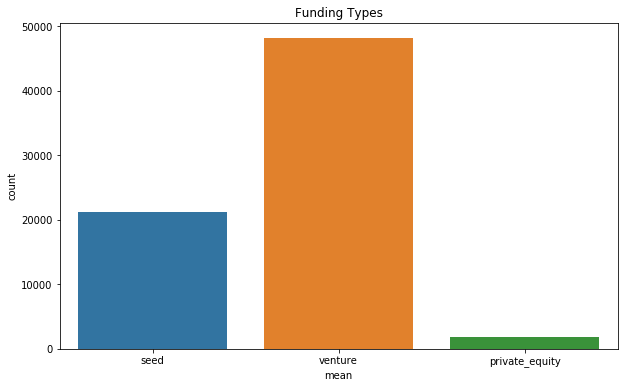

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='mean',y="count",data=master_frame_FT)
plt.title("Funding Types")
plt.xticks([0,1,2],['seed','venture','private_equity'])
#plt.xlabel("""1.seed                      2.venture                       3.private_equity 
         #       Average amount of investment """)
plt.show()



####  Choosen investement type : venture
Next is to filter out data whose funding_round_type is Venture

In [25]:
master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame.info()
#48111

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48111 entries, 0 to 114934
Data columns (total 9 columns):
permalink                  48111 non-null object
name                       48111 non-null object
category_list              47809 non-null object
status                     48111 non-null object
country_code               48111 non-null object
funding_round_permalink    48111 non-null object
funding_round_type         48111 non-null object
funded_at                  48111 non-null object
raised_amount_usd          48111 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.7+ MB


In [26]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


From master_frame we will extract top9 countries using by grouping on the bases of country_code with total funding in each country.

In [27]:
top9=pd.DataFrame(master_frame.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending=False))
top9=top9.iloc[0:9,]

In [28]:
print("Top 9 countries with highest total funding")
top9

Top 9 countries with highest total funding


,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


Next step is  indentify top3 countries whose native language is english speaking country. To identify these I have manually used  document for english speaking countries and external source "https://countrycode.org/" to map country code with country name.
 

### Plot 2  Investment in Top9 countries 

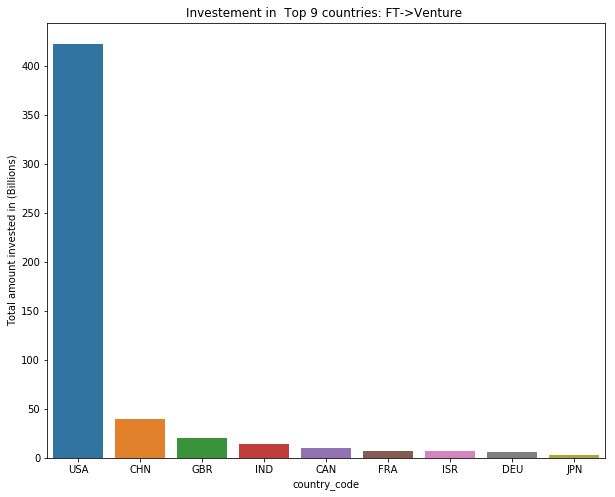

In [29]:
# Value of amount raised is high so , raised_amount_value is divided by 1 billion
plt.figure(figsize=(10,8))
sns.barplot(x=top9.index,y=top9["raised_amount_usd"]/1000000000)

plt.ylabel("Total amount invested in (Billions)")
plt.title("Investement in  Top 9 countries: FT->Venture ")
plt.show()

#### Out of top9 countries , top 3 english speaking countries with highest investement is ( 1.USD,2. GBR,3. IND) 
#### CHN is not english speaking country


In [30]:
# Filtering master_frame with top3 countries
Top3_countries=['USA','GBR','IND']
master_frame=master_frame[master_frame.country_code.isin(Top3_countries)]
master_frame[master_frame['country_code'].isin(Top3_countries)].country_code.value_counts()

USA    36139
GBR     2055
IND      824
Name: country_code, dtype: int64

As per discussion with CEO , only first string before vertical pipe will be considered as primary sector. For that seperate column "primary sector" is added for storing sub-sector extracted from category_list.

In [31]:
#function used for extracting primary sector
def category(word):
    if '|' in str(word) :
        return word[:word.index("|")]
    else:
        return word

master_frame['primary_sector']= master_frame['category_list'].apply(category)


In [32]:
master_frame

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
28,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
34,/ORGANIZATION/1000MEMORIES,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
38,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,Curated Web,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web
39,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,Curated Web,operating,USA,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,Curated Web
41,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,Curated Web,operating,USA,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,Curated Web


Load mapping file into dataframe, for mapping main sectors to primary sector.

In [33]:
mapping=pd.read_csv("C:/Users/chiru/Downloads/upgrad docs/Investement analysis/mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


It is observed that for mapping each sector , first we need to convert from wide to long data format and rename it into “main_sector”. Then master_frame and mapping dataframe is merged on column “category_list”.

In [34]:
id_vars=mapping.columns[0]
value_vars=mapping.columns[1:]
#[id_vars]
#print(list(value_vars))
mapping=pd.melt(mapping,id_vars=[id_vars],value_vars=list(value_vars))


In [35]:
#removing rows whose value is 0 
mapping=mapping.loc[(mapping.value==1),:'variable']
#renaming column name variable to main_sector and category_list to primary_sector
mapping=mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'})


In [36]:
mapping.head()

,primary_sector,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


Mapping main_sector to primary_sector by using merge function

In [37]:
sector_analysis=pd.merge(master_frame,mapping,how="inner",on="primary_sector")
sector_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36402 entries, 0 to 36401
Data columns (total 11 columns):
permalink                  36402 non-null object
name                       36402 non-null object
category_list              36187 non-null object
status                     36402 non-null object
country_code               36402 non-null object
funding_round_permalink    36402 non-null object
funding_round_type         36402 non-null object
funded_at                  36402 non-null object
raised_amount_usd          36402 non-null float64
primary_sector             36187 non-null object
main_sector                36402 non-null object
dtypes: float64(1), object(10)
memory usage: 3.3+ MB


In [38]:
sector_analysis.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
2,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment
3,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment


As mentioned in Checkpoint 5 , we will create 3 seperate dataframes for each countries within investment range 5 million to 15 million. 

In [39]:
#segrating into 3 countries with investement range 5 milloin to 15 million.
country_1=sector_analysis.loc[(sector_analysis.country_code=='USA')&(sector_analysis['raised_amount_usd']>=5000000.0)&(sector_analysis['raised_amount_usd']<=15000000.0)]
country_2=sector_analysis.loc[(sector_analysis.country_code=='GBR')&(sector_analysis['raised_amount_usd']>=5000000.0)&(sector_analysis['raised_amount_usd']<=15000000.0)]
country_3=sector_analysis.loc[(sector_analysis.country_code=='IND')&(sector_analysis['raised_amount_usd']>=5000000.0)&(sector_analysis['raised_amount_usd']<=15000000.0)]

In [40]:
#For USA
print("total investment count in USA ",country_1['funding_round_type'].count())
print("total amount of investment in USA",country_1['raised_amount_usd'].sum())
#Finding the total number of investment made in each sector.
USA=pd.DataFrame(country_1.groupby(['main_sector']).funding_round_type.count().sort_values(ascending=False))
USA['total_amount_raised']=country_1.groupby(['main_sector']).raised_amount_usd.sum()
USA=USA.rename(columns={'funding_round_type':'total_count'})
USA

total investment count in USA  11235
total amount of investment in USA 100426287841.0


,total_count,total_amount_raised
main_sector,,
Others,2923,2.608928e+10
Cleantech / Semiconductors,2297,2.118100e+10
"Social, Finance, Analytics, Advertising",1912,1.668070e+10
"News, Search and Messaging",1563,1.379682e+10
Health,908,8.200859e+09
Manufacturing,799,7.258553e+09
Entertainment,580,5.000213e+09
Automotive & Sports,167,1.454104e+09
Blanks,86,7.647633e+08


From above result we can conclude that sector Others , Cleantech / Semiconductors	and Social, Finance, Analytics, Advertising are top3 sectors with highest number of investments. On the bases of this we will further find Top company in top2 sectors.

In [41]:
# for finding top_1 company from country_1(USA)
top_1=country_1.loc[country_1.main_sector=='Others']
print("list of companies received highest investment from Top sector : Others")
top_1.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from Top sector : Others


name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

In [42]:
#for finding top_2 company from country_1
top_2=country_1.loc[country_1.main_sector=='Cleantech / Semiconductors']
print("list of companies received highest investment from second best sector : Cleantech / Semiconductors")
top_2.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from second best sector : Cleantech / Semiconductors


name
Biodesix         75300000.0
Tigo Energy      68739496.0
ForSight Labs    61300001.0
Rheonix          56124758.0
SCIenergy        55375423.0
Name: raised_amount_usd, dtype: float64

**Same operations is done for remaning 2 countries .**

In [43]:
#GBR
print("total investment count in GBR",country_2['funding_round_type'].count())
print("total amount of investment in GBR",country_2['raised_amount_usd'].sum())
GBR=pd.DataFrame(country_2.groupby(['main_sector']).funding_round_type.count().sort_values(ascending=False))
GBR['total_amount_raised']=country_2.groupby(['main_sector']).raised_amount_usd.sum()
GBR=GBR.rename(columns={'funding_round_type':'total_count'})
GBR

total investment count in GBR 584
total amount of investment in GBR 5086469206.0


,total_count,total_amount_raised
main_sector,,
Others,143,1.249124e+09
Cleantech / Semiconductors,127,1.136905e+09
"Social, Finance, Analytics, Advertising",98,8.218884e+08
"News, Search and Messaging",73,6.157462e+08
Entertainment,54,4.615111e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08
Blanks,7,5.776485e+07


From above result we can conclude that sector Others , Cleantech / Semiconductors	and Social, Finance, Analytics, Advertising are top3 sectors with highest number of investments. On the bases of this we will further find Top company from top2 sectors.

In [44]:
# for finding top_1 company from country_2(GBR)
top_1=country_2.loc[country_2.main_sector=='Others']
print("list of companies received highest investment from Top sector : Others")
top_1.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from Top sector : Others


name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [45]:
#for finding top_2 company from country_2
top_2=country_2.loc[country_2.main_sector=='Cleantech / Semiconductors']
print("list of companies received highest investment from Top sector : Cleantech / Semiconductors")
top_2.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from Top sector : Cleantech / Semiconductors


name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

In [46]:
#IND
print("total investment count in IND",country_3['funding_round_type'].count())
print("total amount of investment in IND",country_3['raised_amount_usd'].sum())
IND=pd.DataFrame(country_3.groupby(['main_sector']).funding_round_type.count().sort_values(ascending=False))
IND['total_amount_raised']=country_3.groupby(['main_sector']).raised_amount_usd.sum()
IND=IND.rename(columns={'funding_round_type':'total_count'})
IND

total investment count in IND 301
total amount of investment in IND 2710537552.0


,total_count,total_amount_raised
main_sector,,
Others,109,1.007410e+09
"News, Search and Messaging",52,4.338345e+08
Entertainment,33,2.808300e+08
"Social, Finance, Analytics, Advertising",32,2.905435e+08
Manufacturing,21,2.009000e+08
Cleantech / Semiconductors,20,1.653800e+08
Health,19,1.677400e+08
Automotive & Sports,13,1.369000e+08
Blanks,2,2.700000e+07


From above result we can conclude that sector Others , News, Search and Messaging	and Entertainment are top3 sectors with highest number of investments. On the bases of this we will further find Top company from top2 sectors.

In [47]:
# for finding top_1 company from country_3
top_1=country_3.loc[country_3.main_sector=='Others']
print("list of companies received highest investment from Top sector : Others")
top_1.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from Top sector : Others


name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [48]:
#for finding top_2 company from country_3
top_2=country_3.loc[country_3.main_sector=='News, Search and Messaging']
print("list of companies received highest investment from Top sector : News, Search and Messaging")
top_2.groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head()

list of companies received highest investment from Top sector : News, Search and Messaging


name
GupShup        33000000.0
IMImobile      23000000.0
SMS GupShup    22000000.0
hike           21000000.0
Roadrunnr      21000000.0
Name: raised_amount_usd, dtype: float64

### Plot 3
Following steps has done:
- Extract Top3 sector from each country
- concatinate those data into seperate dataframe named Top3 on axis=0
- Then added column sector , which represents main sector

In [49]:
USA=USA.iloc[0:3,]
USA["country"]="USA"
GBR=GBR.iloc[0:3,]
GBR["country"]="GBR"
IND=IND.iloc[0:3,]
IND['country']="IND"
Top3=pd.concat([USA,GBR,IND],axis=0)
Top3['sector']=list(Top3.index)

C:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

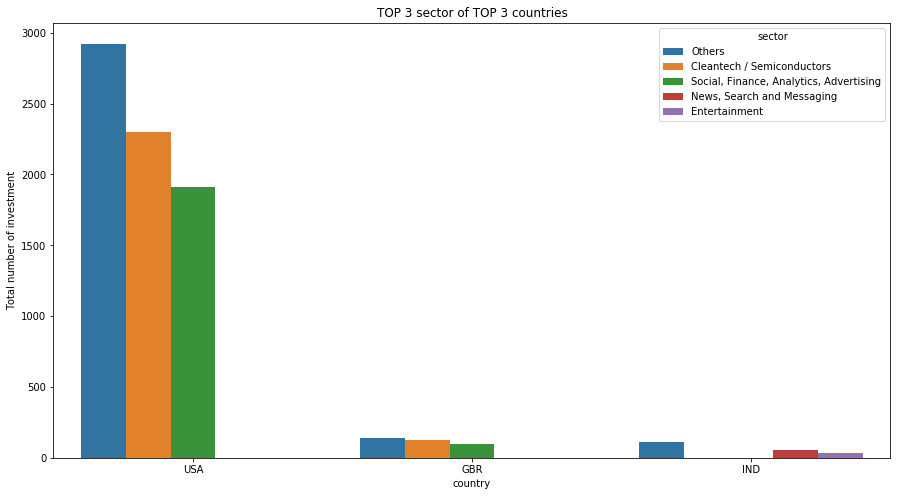

In [50]:
#Plotting data using Barplot
plt.figure(figsize=(15,8))

sns.barplot(y="total_count",x='country',hue="sector",data=Top3)
plt.ylabel("Total number of investment")
plt.title("TOP 3 sector of TOP 3 countries")
plt.show()